In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
from scipy.stats import variation 
from scipy.stats import ttest_rel
import statistics as s
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm

In [2]:
df=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [3]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.shape

(777, 18)

In [5]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:

df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [7]:
df.describe(include='all')

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Monmouth College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [9]:
print(df.nunique())

Names          777
Apps           711
Accept         693
Enroll         581
Top10perc       82
Top25perc       89
F.Undergrad    714
P.Undergrad    566
Outstate       640
Room.Board     553
Books          122
Personal       294
PhD             78
Terminal        65
S.F.Ratio      173
perc.alumni     61
Expend         744
Grad.Rate       81
dtype: int64


In [12]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [13]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


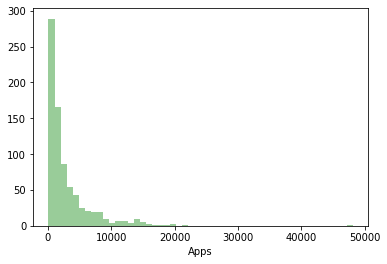

BoxPlot of Apps
----------------------------------------------------------------------------


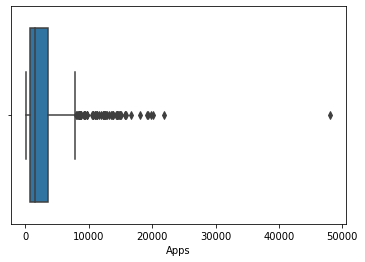

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


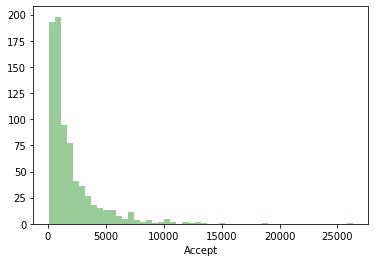

BoxPlot of Accept
----------------------------------------------------------------------------


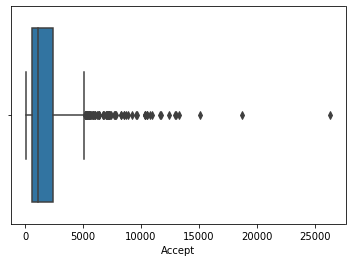

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


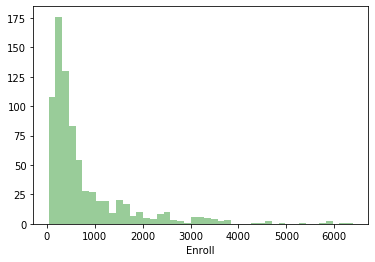

BoxPlot of Enroll
----------------------------------------------------------------------------


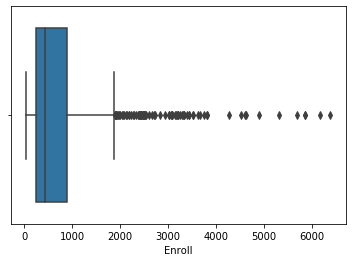

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


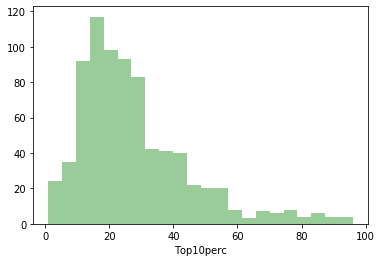

BoxPlot of Top10perc
----------------------------------------------------------------------------


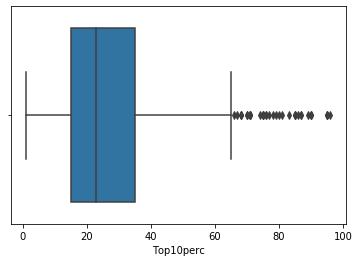

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


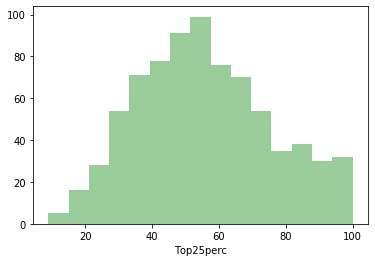

BoxPlot of Top25perc
----------------------------------------------------------------------------


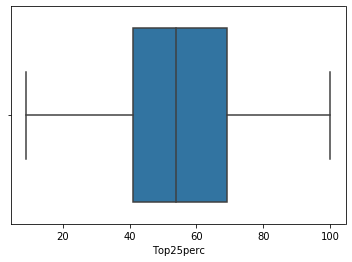

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


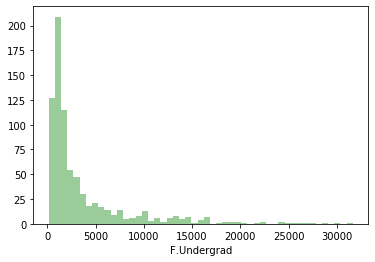

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


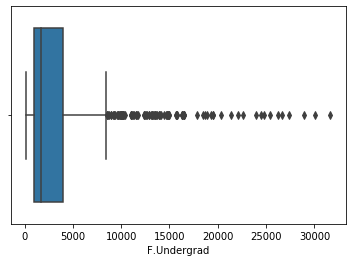

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


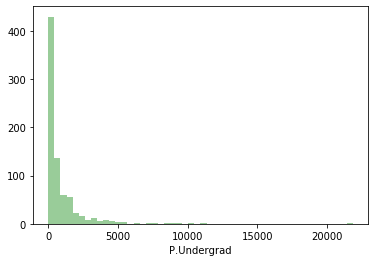

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


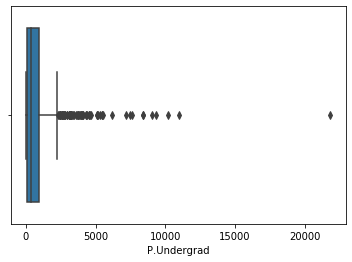

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


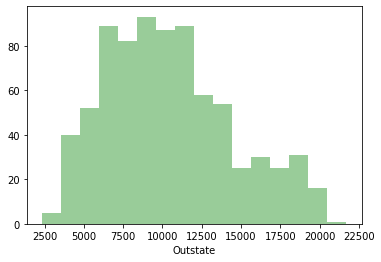

BoxPlot of Outstate
----------------------------------------------------------------------------


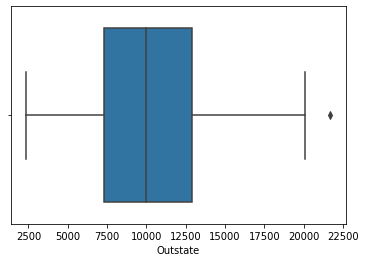

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


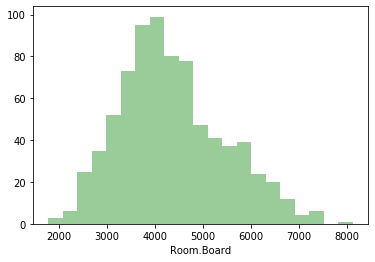

BoxPlot of Room.Board
----------------------------------------------------------------------------


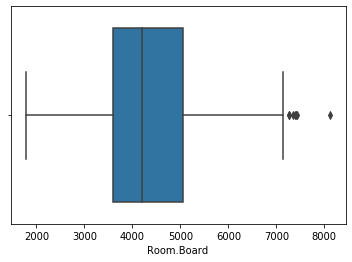

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


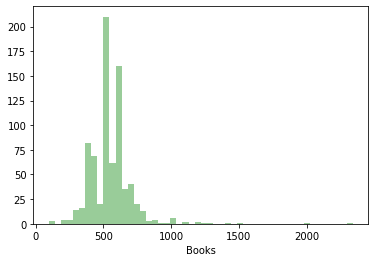

BoxPlot of Books
----------------------------------------------------------------------------


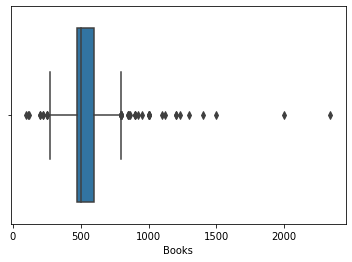

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


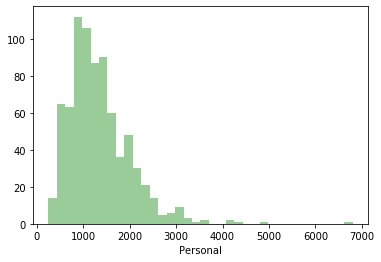

BoxPlot of Personal
----------------------------------------------------------------------------


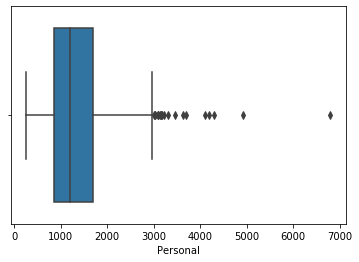

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


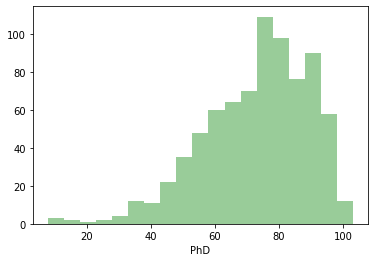

BoxPlot of PhD
----------------------------------------------------------------------------


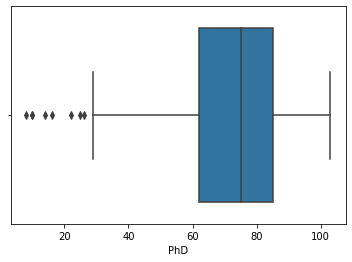

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


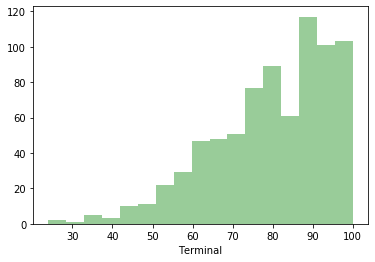

BoxPlot of Terminal
----------------------------------------------------------------------------


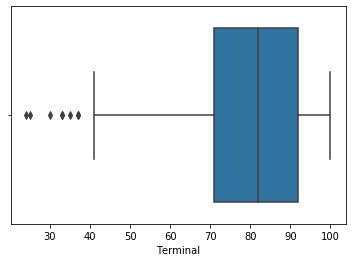

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


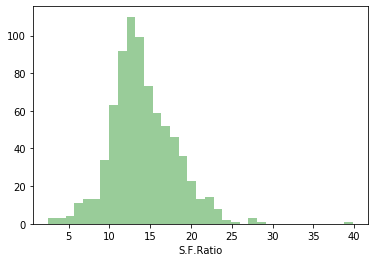

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


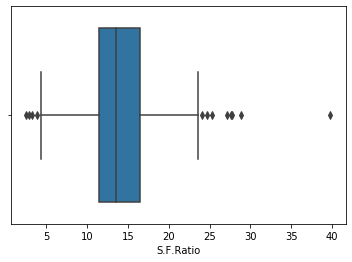

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


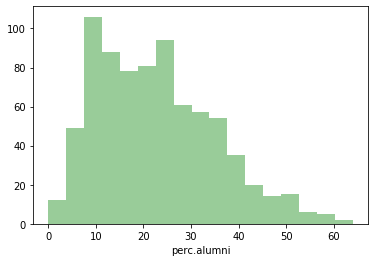

BoxPlot of perc.alumni
----------------------------------------------------------------------------


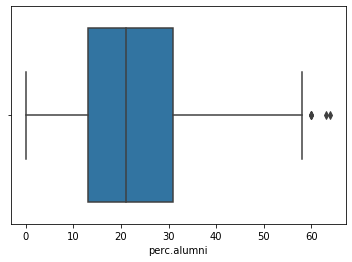

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


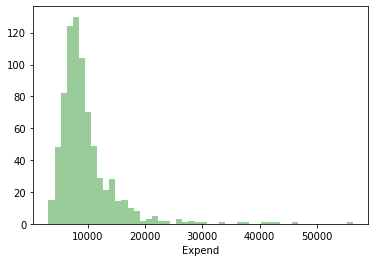

BoxPlot of Expend
----------------------------------------------------------------------------


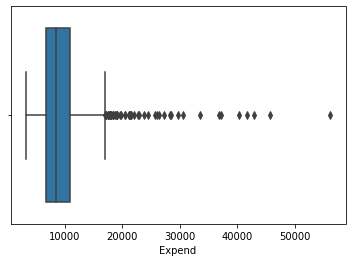

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


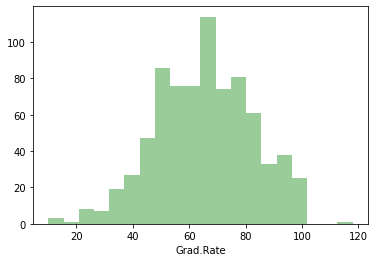

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


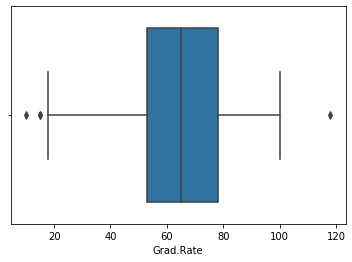

In [108]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,10)

In [87]:
corr = df_num.corr(method='pearson')

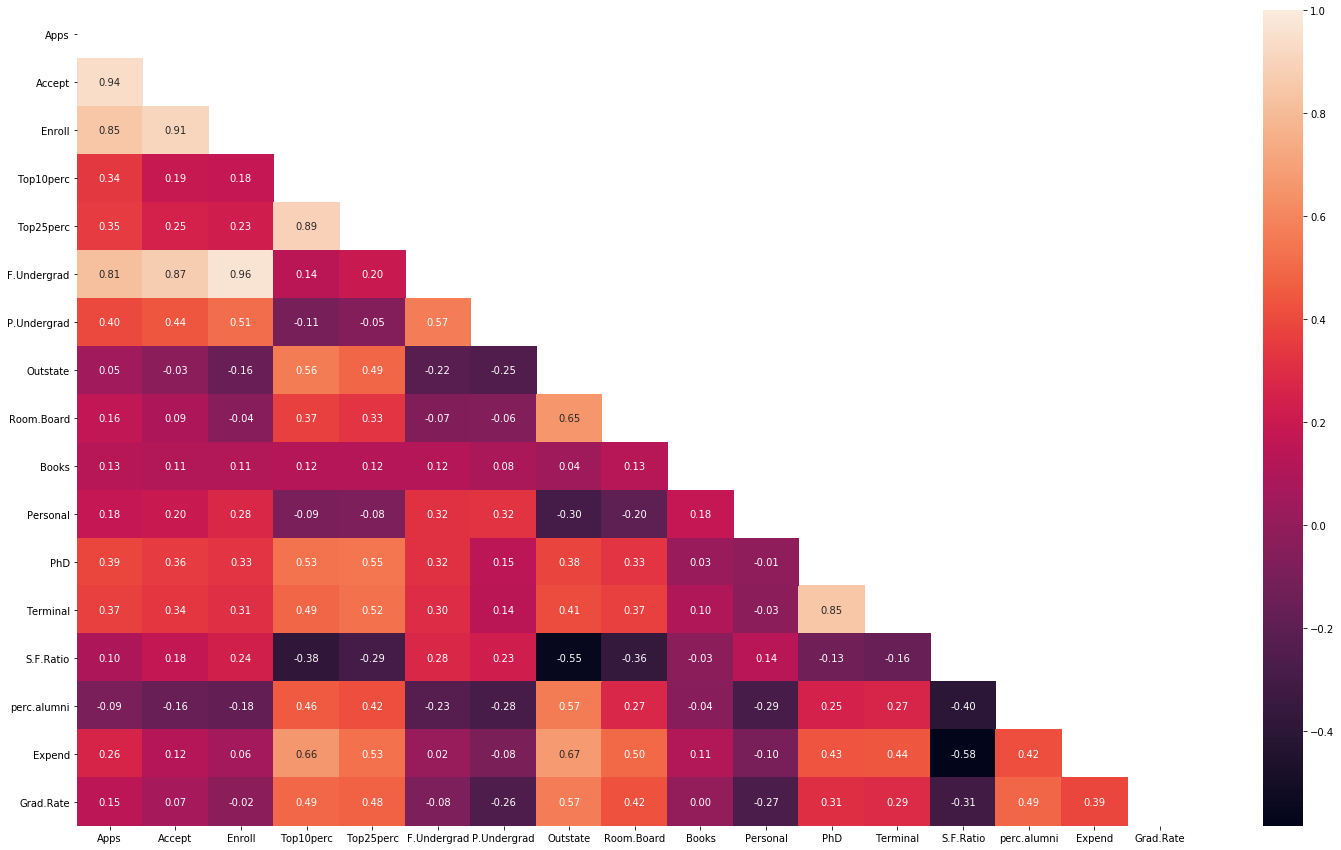

In [88]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

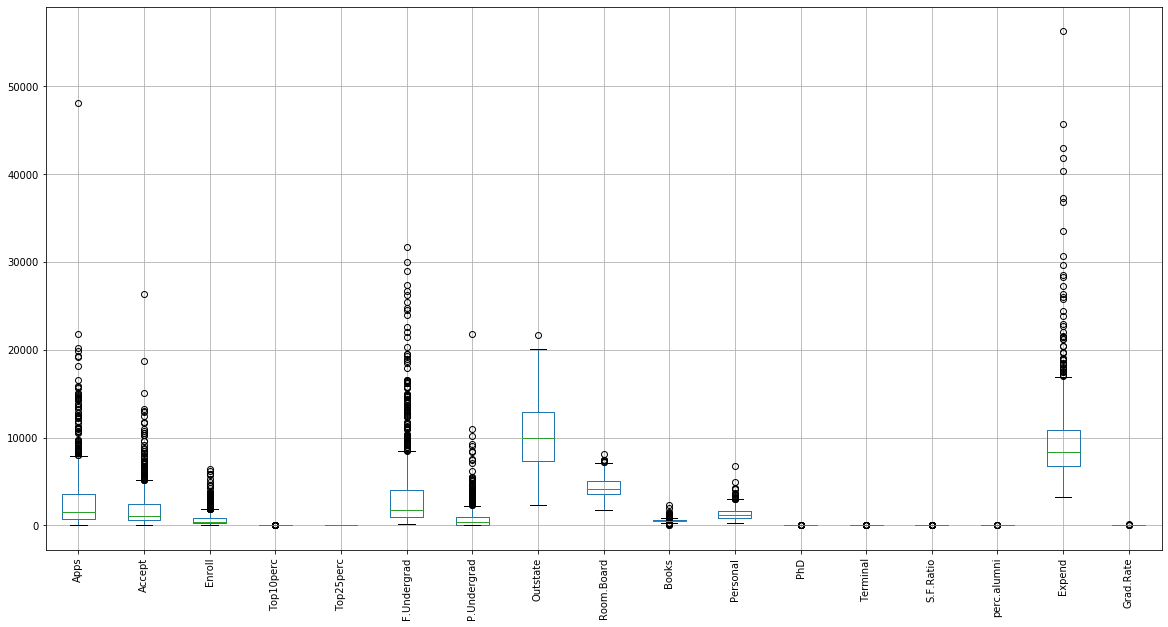

In [102]:
df_num.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [103]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()



,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [56]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


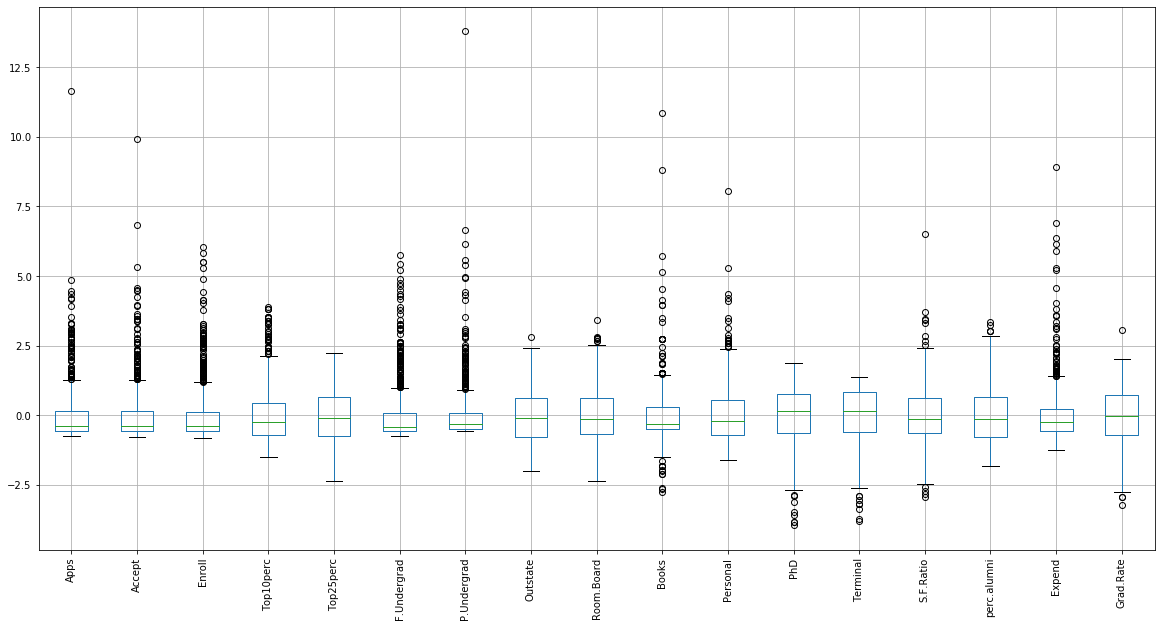

In [104]:
df_num_scaled.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

# Statistical tests to be done before PCA

#### Bartletts Test of Sphericity

In [51]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

C:\Users\josep\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

#### KMO Test    

In [58]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8131251200373522

In [149]:

cov_matrix = np.cov(df_num.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.49784595e+07  8.94985981e+06  3.04525599e+06  2.31327731e+04
   2.69526635e+04  1.52897025e+07  2.34662015e+06  7.80970356e+05
   7.00072872e+05  8.47037526e+04  4.68346833e+05  2.46894337e+04
   2.10530676e+04  1.46506058e+03 -4.32712238e+03  5.24617110e+06
   9.75642164e+03]
 [ 8.94985981e+06  6.00795970e+06  2.07626776e+06  8.32112487e+03
   1.20134048e+04  1.03935824e+07  1.64666972e+06 -2.53962285e+05
   2.44347147e+05  4.59428079e+04  3.33556631e+05  1.42382015e+04
   1.21820938e+04  1.70983819e+03 -4.85948702e+03  1.59627169e+06
   2.83416292e+03]
 [ 3.04525599e+06  2.07626776e+06  8.63368392e+05  2.97158341e+03
   4.17259244e+03  4.34752988e+06  7.25790674e+05 -5.81188483e+05
  -4.09970592e+04  1.72911997e+04  1.76737970e+05  5.02896117e+03
   4.21708603e+03  8.72684773e+02 -2.08169379e+03  3.11345431e+05
  -3.56587977e+02]
 [ 2.31327731e+04  8.32112487e+03  2.97158341e+03  3.11182456e+02
   3.11630480e+02  1.20891137e+04 -2.82947498e+03  3.99071798e+

In [165]:
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [151]:

cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [169]:
cov_matrix.round(4)

array([[ 1.0013,  0.9447,  0.8479,  0.3393,  0.3521,  0.8155,  0.3988,
         0.0502,  0.1652,  0.1327,  0.179 ,  0.3912,  0.37  ,  0.0958,
        -0.0903,  0.2599,  0.1469],
       [ 0.9447,  1.0013,  0.9128,  0.1927,  0.2478,  0.8753,  0.4418,
        -0.0258,  0.091 ,  0.1137,  0.2012,  0.3562,  0.338 ,  0.1765,
        -0.1602,  0.1249,  0.0674],
       [ 0.8479,  0.9128,  1.0013,  0.1815,  0.227 ,  0.9659,  0.5137,
        -0.1557, -0.0403,  0.1129,  0.2813,  0.3319,  0.3087,  0.2376,
        -0.181 ,  0.0643, -0.0224],
       [ 0.3393,  0.1927,  0.1815,  1.0013,  0.8931,  0.1415, -0.1055,
         0.5631,  0.372 ,  0.119 , -0.0934,  0.5325,  0.4918, -0.3854,
         0.4561,  0.6618,  0.4956],
       [ 0.3521,  0.2478,  0.227 ,  0.8931,  1.0013,  0.1997, -0.0536,
         0.49  ,  0.3319,  0.1157, -0.0809,  0.5466,  0.5254, -0.295 ,
         0.4184,  0.5281,  0.4779],
       [ 0.8155,  0.8753,  0.9659,  0.1415,  0.1997,  1.0013,  0.5712,
        -0.216 , -0.069 ,  0.1157,  0.3

In [1]:
corr = df_num_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

NameError: name 'df_num_scaled' is not defined

In [2]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)

NameError: name 'np' is not defined

In [3]:
eig_vecs.round(2)[0]

NameError: name 'eig_vecs' is not defined

In [61]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


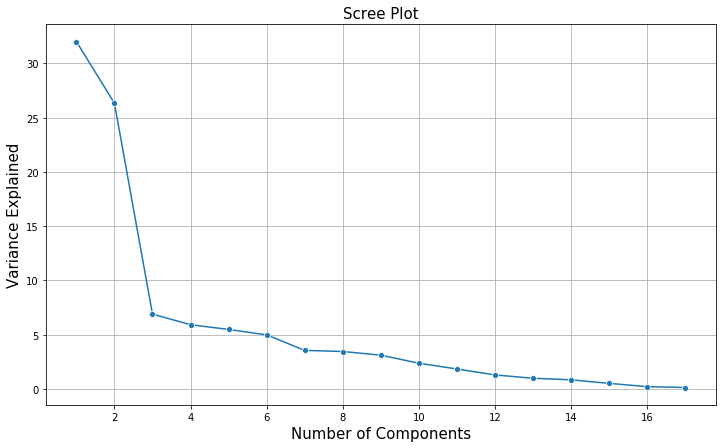

In [62]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() 

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352401e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073616e-01,  2.27879810e+00, -4.38092815e-01, ...,
        -4.05798710e-04,  2.07356387e+00, -1.32891523e+00],
       [-9.21749291e-01,  3.58891825e+00,  6.77240533e-01, ...,
         5.43164956e-02,  8.52053749e-01, -1.08022442e-01],
       [-7.43975435e-01,  1.05999660e+00, -3.69613276e-01, ...,
        -5.16021192e-01, -9.47754660e-01, -1.13217598e+00],
       [-2.98306092e-01, -1.77137311e-01, -9.60591689e-01, ...,
         4.68014225e-01, -2.06993735e+00,  8.39893075e-01]])

In [183]:
 pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [153]:
aa= pca.components_.round(2)

In [154]:
aa[0]

array([ 0.25,  0.21,  0.18,  0.35,  0.34,  0.15,  0.03,  0.29,  0.25,
        0.06, -0.04,  0.32,  0.32, -0.18,  0.21,  0.32,  0.25])

In [188]:
df_num.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [194]:
print('The Linear eq of 1st component: ')
for i in range(0,df_num.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_num.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

In [181]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled),index=['Willingness to spend','Admission rate','College Expenses','Faculty','Competition',
                                  'Student Pool'])
df_pca_loading.T

,Willingness to spend,Admission rate,College Expenses,Faculty,Competition,Student Pool
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055


In [156]:
df_pca_loading.head(8)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163


In [157]:
from matplotlib.patches import Rectangle

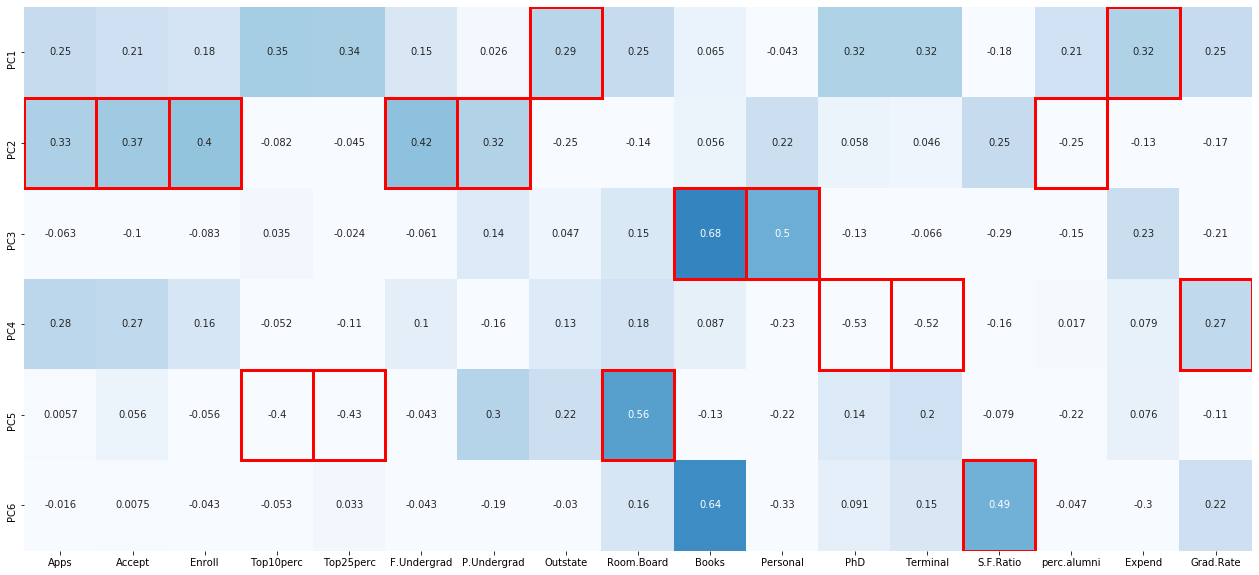

In [159]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [161]:
df_pca = pd.DataFrame(df_pca,columns=['Willingness to spend','Admission rate','College Expenses','Faculty','Competition',
                                  'Student Pool'])
df_pca

,Willingness to spend,Admission rate,College Expenses,Faculty,Competition,Student Pool
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918
...,...,...,...,...,...,...
772,-3.328458,1.220255,-0.383388,0.108555,0.776996,0.309429
773,0.199389,-0.686689,0.051563,0.562269,0.375191,0.373343
774,-0.732561,-0.077235,-0.000406,0.054316,-0.516021,0.468014
775,7.919327,-2.068329,2.073564,0.852054,-0.947755,-2.069937


In [162]:
df_new1 = pd.concat([df, df_pca], axis=1)
df_new1

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,...,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Willingness to spend,Admission rate,College Expenses,Faculty,Competition,Student Pool
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,...,18.1,12,7041,60,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,...,12.2,16,10527,56,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,...,12.9,30,8735,54,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,...,7.7,37,19016,59,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,...,11.9,2,10922,15,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,...,21.0,14,4469,40,-3.328458,1.220255,-0.383388,0.108555,0.776996,0.309429
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,...,13.3,31,9189,83,0.199389,-0.686689,0.051563,0.562269,0.375191,0.373343
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,...,14.4,20,8323,49,-0.732561,-0.077235,-0.000406,0.054316,-0.516021,0.468014
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,...,5.8,49,40386,99,7.919327,-2.068329,2.073564,0.852054,-0.947755,-2.069937


In [163]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Names']

In [164]:
df_new = pd.concat([df_cat, df_pca], axis=1)
df_new

,Names,Willingness to spend,Admission rate,College Expenses,Faculty,Competition,Student Pool
0,Abilene Christian University,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306
1,Adelphi University,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137
2,Adrian College,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592
3,Agnes Scott College,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508
4,Alaska Pacific University,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918
...,...,...,...,...,...,...,...
772,Worcester State College,-3.328458,1.220255,-0.383388,0.108555,0.776996,0.309429
773,Xavier University,0.199389,-0.686689,0.051563,0.562269,0.375191,0.373343
774,Xavier University of Louisiana,-0.732561,-0.077235,-0.000406,0.054316,-0.516021,0.468014
775,Yale University,7.919327,-2.068329,2.073564,0.852054,-0.947755,-2.069937


In [84]:
df_new.shape

(777, 6)

In [85]:
df_new.head()


,Names,Willingness to spend,Competition,College Expenses,Faculty,Student Pool
0,Abilene Christian University,-1.592855,0.767334,-0.101074,-0.921749,-0.743975
1,Adelphi University,-2.192402,-0.578830,2.278797,3.588919,1.059997
2,Adrian College,-1.430964,-1.092819,-0.438093,0.677241,-0.369613
3,Agnes Scott College,2.855557,-2.630612,0.141720,-1.295485,-0.183836
4,Alaska Pacific University,-2.212008,0.021631,2.387029,-1.114538,0.684451


In [86]:
df_new.describe(include='all')

,Names,Willingness to spend,Competition,College Expenses,Faculty,Student Pool
count,777,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
unique,777,NaN,NaN,NaN,NaN,NaN
top,Monmouth College,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.300261e-17,-1.485298e-16,6.858521e-18,1.859302e-17,4.515193e-17
std,NaN,2.334635e+00,2.117453e+00,1.083821e+00,1.004094e+00,9.665564e-01
min,NaN,-5.662905e+00,-3.590891e+00,-2.941288e+00,-2.943103e+00,-2.690123e+00
25%,NaN,-1.731200e+00,-1.348075e+00,-6.663062e-01,-6.558314e-01,-6.998494e-01
50%,NaN,-2.994567e-01,-6.268330e-01,-1.010741e-01,-5.842815e-02,-5.112369e-02
75%,NaN,1.339533e+00,6.924474e-01,4.943713e-01,5.987762e-01,6.313472e-01


In [182]:
from sklearn.model_selection import train_test_split
